# Machine Learning from scratch

This are lecture notes entirely made from the book *Machine Learning with Python Cookbook : Practical Solutions from Preprocessing to Deep Learning* by Chris Albon.

The different sections in this notebook are just the chosen chapters in the book above.

Join me in this journey.

# Chap 1. Vectors, Matrices and Arrays

`NumPy` is the foundation of the Python machine learning stack. `NumPy` allows for efficient operations on the data structures often used in machine learning: *vectors, matrices, and tensors*. While `NumPy` is not the focus of this course, it will show up frequently throughout the following chapters. This chapter covers the most common `NumPy` operations we are likely to run into while working on machine learning workflows.

### 1.1 Creating a Vector

#### Problem
You need to create a vector.

In [1]:
import numpy as np

#create a row vector
vec_row = np.array([1, 2, 3])
vec_row

array([1, 2, 3])

In [2]:
#create a column vector
vec_col = np.array([[1],
                   [2],
                   [3]])
vec_col

array([[1],
       [2],
       [3]])

### 1.2 Creating a Matrix
#### Problem
You need to create a matrix.

In [3]:
matrix = np.array([[1,2,3],
                   [3,4,5]])
matrix

array([[1, 2, 3],
       [3, 4, 5]])

#### Remark
NumPy actually has a dedicated matrix data structure:

In [4]:
matrix_object = np.mat([[1,2,3],
                        [3,4,5]])
matrix_object

matrix([[1, 2, 3],
        [3, 4, 5]])

However, the matrix data structure is not recommended for two reasons. 
- First, arrays are the de facto standard data structure of NumPy.
- Second, the vast majority of NumPy operations return arrays, not matrix objects.

### 1.3 Creating a Sparse Matrix
A **sparse matrix** is a matrix (a 2D grid of numbers) in which the majority of the elements are zero.
## Problem
Given data with very few nonzero values, you want to efficiently represent it.

In [5]:
from scipy import sparse

#create a matrix
matrix = np.array([[0,0],
                   [0,1],
                   [3,0]])

#create compressed sparse row (CSR) matrix
matrix_sparse = sparse.csr_matrix(matrix)
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


#### Discussion
A frequent situation in machine learning is having a huge amount of data; however, most of the elements in the data are zeros. For example, imagine a matrix where the columns are every movie on Netflix, the rows are every Netflix user, and the values are how many times a user has watched that particular movie. This matrix would have tens of thousands of columns and millions of rows! However, since most users do not watch most movies, the vast majority of elements would be zero. Sparse matrices only store nonzero elements and assume all other values will be zero, leading to significant computational savings. In our solution, we created a NumPy array with two nonzero values, then converted it into a sparse matrix.

In compressed sparse row (CSR) matrices, (1, 1) and (2, 0) represent the (zero-indexed) indices of the non- zero values 1 and 3, respectively.

### 1.4 Selecting Elements
#### Problem
You need to select one or more elements in a vector or matrix.

In [6]:
vector = np.array([1,2,3,4,5,6])

matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(f"Vector = {vector} and \n Matrix = {matrix}")


Vector = [1 2 3 4 5 6] and 
 Matrix = [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
#select the third element of the vector
vector[2]

3

In [8]:
#select second row, third column element
matrix[1, 2]

6

In [9]:
#selct all elements of a vector
vector[:]

array([1, 2, 3, 4, 5, 6])

In [10]:
#select everything up to and including the third element
vector[:3]

array([1, 2, 3])

In [11]:
#select everything after the third element
vector[3:]

array([4, 5, 6])

In [12]:
#select the last element
vector[-1]

6

In [13]:
#select the first two rows and all columns of a matrix
matrix[:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
#select all rows and the second column
matrix[:,1:2]

array([[2],
       [5],
       [8]])

### 1.5 Describing a Matrix
#### Problem
You want to describe the shape, size, and dimensions of the matrix.

In [15]:
# Create matrix
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

matrix

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [16]:
#view the number of rows and columns
matrix.shape

(3, 4)

In [17]:
#view the number of elements (rows * columns)
matrix.size

12

In [18]:
#view the number of dimensions
matrix.ndim

2

### 1.6 Applying Operations to Elements
#### Problem
You want to apply some function to multiple elements in an array.

In [19]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
#create a function that adds 100 to something
add_100 = lambda i : i + 100

In [21]:
#create a vactorized function
vectorized_add_100 = np.vectorize(add_100)

In [22]:
#apply function to all elements in matrix
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

#### Discussion
NumPy’s `vectorize` class converts a function into a function that can apply to all elements in an array or slice of an array. It’s worth noting that vectorize is essentially a for loop over the elements and does not increase performance. Furthermore, NumPy arrays allow us to perform operations between arrays even if their dimensions are not the same (a process called **broadcasting**). For example, we can create a much simpler version of our solution using broadcasting:

In [23]:
matrix + 100

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

### 1.7 Finding the Maximum and Minimum Values
### Problem
You need to find the maximum or minimum value in an array.

In [24]:
matrix = matrix + 100
matrix

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [25]:
#return maximum element
np.max(matrix)

109

In [26]:
#return the min element
np.min(matrix)

101

#### Discussion
Often we want to know the maximum and minimum value in an array or subset of an array. This can be accomplished with the `max` and `min` methods. Using the axis parameter we can also apply the operation along a certain axis:

In [27]:
#find the maximum element in each column
np.max(matrix, axis = 0)

array([107, 108, 109])

In [28]:
#find the minimum element in each row
np.min(matrix, axis=0)

array([101, 102, 103])

### 1.8 Calculating the Average, Variance, and Standard Deviation
#### Problem
You want to calculate some descriptive statistics about an array.

In [29]:
#the mean
np.mean(matrix)

105.0

In [30]:
#variance
np.var(matrix)

6.666666666666667

In [31]:
#standard deviation
np.std(matrix)

2.581988897471611

In [32]:
#find the mean value in each column
np.mean(matrix, axis= 0)

array([104., 105., 106.])

In [33]:
#find mean in each row
np.mean(matrix, axis = 1)

array([102., 105., 108.])

### 1.9 Reshaping Arrays
### Problem
You want to change the shape (number of rows and columns) of an array without
changing the element values.

In [34]:
# Create 4x3 matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])
matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [35]:
matrix.size

12

In [36]:
#reshape matrix into 2x6 matrix
matrix.reshape(2,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [37]:
matrix.size

12

In [38]:
matrix.reshape(3,4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [39]:
matrix.reshape(3,4).size

12

#### Discussion
reshape allows us to restructure an array so that we maintain the same data but it is organized as a different number of rows and columns. The only requirement is that the shape of the original and new matrix contain the same number of elements (i.e., the same size).

One useful argument in `reshape` is -1, which effectively means “as many as needed,” so `reshape(-1, 1)` means one row and as many columns as needed:

In [40]:
matrix.reshape(1,-1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [41]:
matrix.reshape(-1, 1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

Finally, if we provide one integer, reshape will return a 1D array of that length:

In [42]:
matrix.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### 1.10 Transposing a Vector or Matrix
### Problem
You need to transpose a vector or matrix.

In [43]:
#transpose matrix
matrix.T

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

### 1.11 Flattening a Matrix
### Problem
You need to transform a matrix into a one-dimensional array.

In [44]:
matrix.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### 1.12 Finding the Rank of a Matrix
### Problem
You need to know the rank of a matrix.

In [45]:
np.linalg.matrix_rank(matrix)

2

#### Discussion
The rank of a matrix is the dimensions of the vector space spanned by its columns or rows. Finding the rank of a matrix is easy in NumPy thanks to `matrix_rank`.

### 1.13 Calculating the Determinant
### Problem
You need to know the determinant of a matrix.

In [46]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])
matrix

array([[1, 2, 3],
       [2, 4, 6],
       [3, 8, 9]])

In [47]:
np.linalg.det(matrix)

0.0

### 1.14 Getting the Diagonal of a Matrix
### Problem
You need to get the diagonal elements of a matrix.

In [48]:
matrix.diagonal()

array([1, 4, 9])

### Discussion
NumPy makes getting the diagonal elements of a matrix easy with `diagonal`. It is also possible to get a diagonal off from the main diagonal by using the `offset` parameter:

In [49]:
#return diagonal one above the main diagonal
matrix.diagonal(offset=1)

array([2, 6])

In [50]:
#return diagonal one below the main diagonal
matrix.diagonal(offset=-1)

array([2, 8])

### 1.15 Calculating the Trace of a Matrix
### Problem
You need to calculate the trace of a matrix.

In [51]:
#return the trace of matrix
matrix.trace()

14

In [52]:
#Use the definition of the trace
sum(matrix.diagonal())

14

### 1.16 Finding Eigenvalues and Eigenvectors
### Problem
You need to find the eigenvalues and eigenvectors of a square matrix.

In [53]:
matrix = np.array([[1, -1, 3],
                   [1, 1, 6],
                   [3, 8, 9]])

In [54]:
#calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

In [55]:
#show eigenvalues
eigenvalues

array([13.55075847,  0.74003145, -3.29078992])

In [56]:
#show eigenvectors
eigenvectors

array([[-0.17622017, -0.96677403, -0.53373322],
       [-0.435951  ,  0.2053623 , -0.64324848],
       [-0.88254925,  0.15223105,  0.54896288]])

### 1.17 Calculating Dot Products
### Problem
You need to calculate the dot product of two vectors.

In [57]:
vec1 = np.array([1,2,3])
vec2 = np.array([4,5,6])

#compute the dot product
np.dot(vec1, vec2)

32

### Discussion
The dot product of two vectors, $a = (a_1, \ldots, a_n)$ and $b = (b_1, \ldots, b_n)$, is defined as:
$$ \sum_{i=1}^{n}a_i b_i $$
We can use NumPy’s `dot` class to calculate the dot product. Alternatively, in Python 3.5+ we can use the new `@` operator:

In [58]:
vec1 @ vec2

32

### 1.18 Adding and Subtracting Matrices
### Problem
You want to add or subtract two matrices.

In [59]:
mat_1 = np.array([[1,2,3],
                  [0,3,0],
                  [4,4,4]])

mat_2 = np.array([[1, 1, 1],
                  [1, 1, 1],
                  [1, 1, 2]])

In [60]:
#add two matrices
np.add(mat_1, mat_2)

array([[2, 3, 4],
       [1, 4, 1],
       [5, 5, 6]])

In [61]:
##which the same as
mat_1 + mat_2

array([[2, 3, 4],
       [1, 4, 1],
       [5, 5, 6]])

In [62]:
# subtract two matrices
np.subtract(mat_1, mat_2)

array([[ 0,  1,  2],
       [-1,  2, -1],
       [ 3,  3,  2]])

In [63]:
mat_1 - mat_2

array([[ 0,  1,  2],
       [-1,  2, -1],
       [ 3,  3,  2]])

### 1.19 Multiplying Matrices
### Problem
You want to multiply two matrices.

In [64]:
#multiply two matrices
np.dot(mat_1, mat_2)

array([[ 6,  6,  9],
       [ 3,  3,  3],
       [12, 12, 16]])

In [65]:
mat_1 @ mat_2

array([[ 6,  6,  9],
       [ 3,  3,  3],
       [12, 12, 16]])

In [66]:
#multiply two matrices element-wise
mat_1 * mat_2

array([[1, 2, 3],
       [0, 3, 0],
       [4, 4, 8]])

### 1.20 Inverting a Matrix
### Problem
You want to calculate the inverse of a square matrix.

In [67]:
mat = np.array([[1,4],
               [2,5]])

In [68]:
#claculate the inverse
np.linalg.inv(mat)

array([[-1.66666667,  1.33333333],
       [ 0.66666667, -0.33333333]])

### Discussion
The inverse of matrix $A$ written $A^{-1}$ verifies $$ A A^{-1} = I $$ with $I$ the identity matrix of the same order as $A$. 

We can check this equality using multiplication of matrices

In [69]:
mat @ np.linalg.inv(mat)

array([[1., 0.],
       [0., 1.]])

### 1.21 Generating Random Values
### Problem
You want to generate pseudorandom values.

In [70]:
#set the seed
np.random.seed(0)

A **seed** is an initial value used to initialize a pseudorandom number generator (PRNG). It determines the starting point for the sequence of *random* numbers that will be generated.

In [71]:
#Create three random floats between 0.0 and 1.0
random_mat = np.random.random(3)
random_mat

array([0.5488135 , 0.71518937, 0.60276338])

In [72]:
#generate three random integers between 1 and 10
np.random.randint(0,11, 3)

array([3, 7, 9])

### Remark 
We can generate rondom numbers by deducing them from a distribution

In [73]:
# Draw three numbers from a normal distribution with mean 0.0
# and standard deviation of 1.0
np.random.normal(0.0, 1.0, 3)

array([-1.42232584,  1.52006949, -0.29139398])

In [74]:
# Draw three numbers from a logistic distribution with mean 0.0 and scale of 1.0
np.random.logistic(0.0, 1.0, 3)

array([-0.98118713, -0.08939902,  1.46416405])

In [75]:
# Draw three numbers greater than or equal to 1.0 and less than 2.0
np.random.uniform(1.0, 2.0, 3)

array([1.47997717, 1.3927848 , 1.83607876])

# Chap 2. Loading Data

## 2.0 Introduction
The first step in machine learning is loading raw data from various sources like *files, databases*, or *logs*. This chapter covers data ingestion from multiple formats including `CSV` and `SQL`, plus generating synthetic data for testing. We'll primarily use `pandas` for loading external data and `scikit-learn` for creating simulated datasets.

### Let's go !

## 2.1 Loading a Sample Dataset
### Problem
You want to load a preexisting sample dataset.

### Solution
`scikit-learn` comes with a number of popular datasets for you to use:

In [76]:
#load scikit-learn's datasets
from sklearn import datasets

In [77]:
#load digits dataset
digits = datasets.load_digits()

In [78]:
# create features matrix
features = digits.data

#create target matrix
target = digits.target

In [79]:
# view first observation
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Discussion

For quick experimentation with machine learning algorithms, we can bypass the heavy lifting of data preparation by using pre-packaged "toy" datasets from `scikit-learn`. These datasets are ideal for learning and prototyping, as they are clean, well-structured, and significantly smaller than real-world data.

Key datasets include:

- `load_boston`
(Note: This dataset is now deprecated due to ethical concerns)
A classic regression dataset with 506 observations on Boston housing prices.

- `load_iris`
A go-to classification dataset with 150 observations of Iris flower measurements.

- `load_digits`
An image classification dataset containing 1,797 samples of handwritten digits.



## 2.2 Creating a Simulated Dataset
## Problem
You need to generate a dataset of simulated data.

**Generating simulated data** means creating artificial, computer-generated datasets instead of using real-world data.

**Purpose:**
- Test algorithms without collecting real data
- Control data properties (size, noise, patterns)
- Create scenarios that are rare or expensive to collect
- Protect privacy by using synthetic data

**Common methods:**
- Statistical distributions (normal, uniform)
- Machine learning models (scikit-learn's `make_classification`, `make_regression`, `make_blobs`)
- Rule-based data generation

## Solution
`scikit-learn` offers many methods for creating simulated data. Of those, three methods are particularly useful.

When we want a dataset designed to be used with **linear regression**, `make_regression` is a good choice:

In [80]:
#load library
from sklearn.datasets import make_regression

In [81]:
#Generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(n_samples = 100,
                                                n_features = 3,
                                                n_informative=3,
                                                n_targets = 1,
                                                noise = 0.0,
                                                coef = True,
                                                random_state = 1)

In [82]:
#view feature matrix and target vector
print("Feature Matrix \n", features[:3])
print("Target Vector \n", target[:3])

Feature Matrix 
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector 
 [-10.37865986  25.5124503   19.67705609]


If we are interested in creating a simulated dataset for **classification**, we can use `make_classification`:

In [83]:
#Load the library
from sklearn.datasets import make_classification

In [84]:
# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1)

In [85]:
#view feature matrix and target vector
print("Feature Matrix \n", features[:3])
print("Target Vector \n", target[:3])

Feature Matrix 
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector 
 [1 0 0]


Finally, if we want a dataset designed to work well with **clustering** techniques, scikit-learn offers `make_blobs`:

In [86]:
#Load the library
from sklearn.datasets import make_blobs

#Generate feature matrix and target vector
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

In [87]:
#view feature matrix and target vector
print("Feature Matrix \n", features[:3])
print("Target Vector \n", target[:3])

Feature Matrix 
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector 
 [0 1 1]


### Discussion
As might be apparent from the solutions, `make_regression` returns a *feature matrix of float values and a target vector of float values*, while `make_classification` and `make_blobs` return a *feature matrix of float values and a target vector of integers* representing membership in a class.

scikit-learn’s simulated datasets offer extensive options to control the type of data generated. scikit-learn’s documentation contains a full description of all the parameters, but a few are worth noting.

In `make_regression` and `make_classification`, `n_informative` determines the
number of features that are used to generate the target vector. If `n_informative` is less than the total number of features (`n_features`), the resulting dataset will have redundant features that can be identified through feature selection techniques.

In addition, `make_classification` contains a weights parameter that allows us to simulate datasets with imbalanced classes. For example, `weights = [.25, .75]` would return a dataset with $25\%$ of observations belonging to one class and $75\%$ of observations belonging to a second class.

For `make_blobs`, the centers parameter determines the number of clusters generated. Using the **matplotlib visualization library**, we can visualize the clusters generated by `make_blobs`:

In [88]:
import matplotlib.pyplot as plt

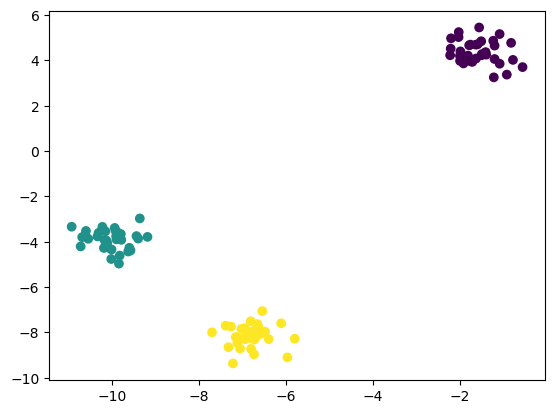

In [89]:
#view scatterplot
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

Read more

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

## 2.3 Loading a CSV File
## Problem
You need to import a comma-separated values (CSV) file.

## Solution
Use the pandas library’s `read_csv` to load a local or hosted CSV file:

In [90]:
#load the library
import pandas as pd

In [91]:
#create path / URL
path = '/home/innocentmc/Desktop/ML Coursera/InfoL2Maths/boston-employee-earnigs-2024.csv'

In [92]:
#load dataset
dataframe = pd.read_csv(path)

#view first two rows
dataframe.head(2)

,_id,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL GROSS,POSTAL
0,1,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"161,306.48","105,724.70","6,906.86","223,773.96",12.52,"45,597.23","32,261.36","575,583.11",02052
1,2,"Sordillo,Paul J",Facilities Management,Building Services Fleet Mgr,"108,815.78","20,055.71","413,783.39","24,772.61",NaN,NaN,NaN,"567,427.49",02127


## Discussion
There are two things to note about loading CSV files. First, it is often useful to take a quick look at the contents of the file before loading. It can be very helpful to see how a dataset is structured beforehand and what parameters we need to set to load in the file. Second, read_csv has over 30 parameters and therefore the documentation can be daunting. Fortunately, those parameters are mostly there to allow it to handle a wide variety of CSV formats.
A common formatting issue with CSV files is that the first line of the file is used to define column headers (e.g., `integer`, `datetime`, `category`,...). The header parameter allows us to specify if or where a header row exists. If a header row does not exist, we set `header=None`.

## 2.4 Loading an Excel File
## Problem
You need to import an Excel spreadsheet.
## Solution
Use the pandas library’s `read_excel` to load an Excel spreadsheet:

### Creating an excel file (Extra)

In this section, we will show how we can create our own dataframe and then save it as an excel file then we can import it using the command above.


In [93]:
# Create sample data (This is just a simple dictionary with keys and values)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'Age': [25, 30, 35, 28, 32],
    'City': ['New York', 'London', 'Tokyo', 'Paris', 'Sydney'],
    'Salary': [50000, 60000, 70000, 55000, 65000],
    'Department': ['IT', 'HR', 'IT', 'Finance', 'Marketing']
}

data

{'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
 'Age': [25, 30, 35, 28, 32],
 'City': ['New York', 'London', 'Tokyo', 'Paris', 'Sydney'],
 'Salary': [50000, 60000, 70000, 55000, 65000],
 'Department': ['IT', 'HR', 'IT', 'Finance', 'Marketing']}

In [94]:
# Create DataFrame
df = pd.DataFrame(data)

In [95]:
# Save to Excel file and show
df.to_excel('sample_data.xlsx', index=False, sheet_name='Employees')

print("Excel file 'sample_data.xlsx' created successfully!")
print("\nData preview:")
print(df)

Excel file 'sample_data.xlsx' created successfully!

Data preview:
      Name  Age      City  Salary Department
0    Alice   25  New York   50000         IT
1      Bob   30    London   60000         HR
2  Charlie   35     Tokyo   70000         IT
3    Diana   28     Paris   55000    Finance
4      Eve   32    Sydney   65000  Marketing


In [96]:
#Load the excel file we created
df_imported = pd.read_excel('sample_data.xlsx', sheet_name='Employees', header=0)
df_imported

,Name,Age,City,Salary,Department
0,Alice,25,New York,50000,IT
1,Bob,30,London,60000,HR
2,Charlie,35,Tokyo,70000,IT
3,Diana,28,Paris,55000,Finance
4,Eve,32,Sydney,65000,Marketing


In [97]:
df_imported.shape

(5, 5)

## Discussion
This solution is similar to our solution for reading CSV files. The main difference is the additional parameter, `sheet_name`, that specifies which sheet in the Excel file we wish to load. `shee_tname` can accept both strings containing the name of the sheet and integers pointing to sheet positions (zero-indexed). If we need to load multiple sheets, include them as a list. For example, `sheet_name=[0,1,2, "Monthly Sales"]` will return a dictionary of pandas DataFrames containing the first, second, and third sheets and the sheet named `Monthly Sales`.

## 2.5 Loading a JSON File
## Problem
You need to load a JSON file for data preprocessing.
## Solution
The pandas library provides `read_json` to convert a JSON file into a pandas object.
To create a JSON file we can convert a pandas DataFrame to JSON by using `to_json` provided by pandas.

In [98]:
# Create a DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'Age': [25, 30, 35, 28, 32],
    'City': ['New York', 'London', 'Tokyo', 'Paris', 'Sydney'],
    'Salary': [50000, 60000, 70000, 55000, 65000],
    'Department': ['IT', 'HR', 'IT', 'Finance', 'Marketing']
})

# Save DataFrame to JSON file
df.to_json('employees_basic.json', orient='records', indent=2)

print("✅ JSON file created using pandas!")
print("\nDataFrame:")
print(df)

✅ JSON file created using pandas!

DataFrame:
      Name  Age      City  Salary Department
0    Alice   25  New York   50000         IT
1      Bob   30    London   60000         HR
2  Charlie   35     Tokyo   70000         IT
3    Diana   28     Paris   55000    Finance
4      Eve   32    Sydney   65000  Marketing


In [99]:
#load data
dataframe = pd.read_json('employees_basic.json', orient='records')

#view the first two rows
dataframe.head(2)

,Name,Age,City,Salary,Department
0,Alice,25,New York,50000,IT
1,Bob,30,London,60000,HR


In [100]:
dataframe.shape

(5, 5)

## Discussion
Importing JSON files into pandas is similar to the last few recipes we have seen. The key difference is the orient parameter, which indicates to pandas how the JSON file is structured. However, it might take some experimenting to figure out which argument (`split`, `records`, `index`, `columns`, and `values`) is the right one. Another helpful tool pandas offers is `json_normalize`, which can help convert semistructured JSON data into a pandas DataFrame.

## Further reading on JSON files in Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html

## 2.6 Querying a SQL Database

## Introduction to SQL Database
SQL Database is a type of database that uses **Structured Query Language (SQL)** to manage and manipulate relational data.
## 1. What is a SQL Database?
A SQL database (also called Relational Database) is an organized collection of structured data stored in tables that are related to each other.

Key Characteristics:
- **Structured Data**: Data organized in rows and columns
- **Pre-defined Schema**: Data structure is defined beforehand
- **ACID Properties**: Ensures data reliability
- **Relationships**: Tables can be linked together

## 2. Basic Structure
```sql
-- Example of a simple SQL table
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    FirstName VARCHAR(50),
    LastName VARCHAR(50),
    DepartmentID INT,
    Salary DECIMAL(10,2),
    HireDate DATE
);

CREATE TABLE Departments (
    DepartmentID INT PRIMARY KEY,
    DepartmentName VARCHAR(50)
);
```
## 3. Popular SQL Databases

| Database | Developer | Key Features |
|----------|-----------|--------------|
| **MySQL** | Oracle | Open-source, widely used for web applications |
| **PostgreSQL** | Community | Advanced features, extensible, JSON support |
| **Microsoft SQL Server** | Microsoft | Enterprise-level, Windows integration |
| **SQLite** | Community | Lightweight, file-based, zero-configuration |
| **Oracle Database** | Oracle | High-performance, enterprise-scale |


## 4. What is Querying?
Querying is asking the database questions to:
- **Retrieve** specific data
- **Filter** and **sort** information
- **Calculate** and **analyze** data
- **Modify** existing records
- **Organize** data in meaningful ways

## 5. Why Querying is Important
- **Data Analysis**: Extract insights from raw data
- **Reporting**: Generate business reports
- **Application Development**: Power backend operations
- **Decision Making**: Support business decisions with data
- **Data Management**: Maintain and update information

## Problem
You need to load data from a database using the structured query language (SQL).

## Solution
pandas’ `read_sql_query` allows us to make a SQL query to a database and load it:

In [101]:
#load library
from sqlalchemy import create_engine
import sqlite3

In [102]:
"""  # Create connection - this creates the file if it doesn't exist
engine = create_engine('sqlite:///sample.db')
    
    # Now read the data
dataframe = pd.read_sql_query('SELECT * FROM data', engine)

# Create database and get data
dataframe.head()
"""

"  # Create connection - this creates the file if it doesn't exist\nengine = create_engine('sqlite:///sample.db')\n    \n    # Now read the data\ndataframe = pd.read_sql_query('SELECT * FROM data', engine)\n\n# Create database and get data\ndataframe.head()\n"

## Chap 3. Data Wringling : Data preprocessing

### 3.0 Introduction

Data wrangling is a broad term used, often informally, to describe the process of transforming raw data to a clean and organized format ready for use. For us, data wrangling is only one step in preprocessing our data, but it is an important step.

Data Wrangling (also called Data Munging) is the **process of cleaning, transforming, and organizing raw data into a structured format suitable for analysis**. It's often considered the most time-consuming part of data science workflows.

Data wrangling involves:

- **Cleaning** dirty data
- **Transforming** data structures
- **Enriching** data with additional sources
- **Validating** data quality
- **Reshaping** data for analysis

The most common data structure used to “*wrangle*” data is the data frame, which can be both intuitive and incredibly versatile. Data frames are tabular, meaning that they are based on rows and columns like you would see in a spreadsheet. Here is a data frame created from data about passengers on the *Titanic*:


In [103]:
import pandas as pd

#create URL
# Load the dataset directly from URL
path = '/home/innocentmc/Desktop/ML Coursera/InfoL2Maths/titanic.csv'

#load data as dataframe
dataframe = pd.read_csv(path)

#show first 5 rows
dataframe.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In this chapter, we will cover a wide variety of techniques to manipulate data frames using the pandas library with the goal of creating a clean, well-structured set of observations for further preprocessing.

## 3.1 Creating a Data Frame

## Problem
You want to create a new data frame.

## Solution
pandas has many methods of creating a new DataFrame object. One easy method is
to create an empty data frame using `DataFrame` and then define each column separately:

In [104]:
#Create DataFrame
dataframe = pd.DataFrame()

#Add columns
dataframe['Name'] = ['Innocent Munguwampaga', 'John Kalala']
dataframe['Age']  = [27, 35]
dataframe['Data Scientist'] = [True, False]

#show the DataFrame
dataframe

,Name,Age,Data Scientist
0,Innocent Munguwampaga,27,True
1,John Kalala,35,False


Equivalently, you can realize the same task by applying `DataFrame` to a dictionary which `keys` are the names of the columns and `values` are the content of those columns as follows :

In [105]:
dataframe = pd.DataFrame({
                         'Name':['Innocent Munguwampaga', 'John Kalala'],
                         'Age':[27, 35],
                         'Data Scientist':[True, False]
                        })
dataframe

,Name,Age,Data Scientist
0,Innocent Munguwampaga,27,True
1,John Kalala,35,False


Alternatively, once we have created a DataFrame object, we can append new rows to the bottom:

In [106]:
#create row
new_person = pd.Series(['Roger Molina', 40, True],
                       index=['Name', 'Age', 'Data Scientist'])

# Append the new row using concat
dataframe = pd.concat([dataframe, pd.DataFrame([new_person])], ignore_index=True)

print(dataframe)

                    Name  Age  Data Scientist
0  Innocent Munguwampaga   27            True
1            John Kalala   35           False
2           Roger Molina   40            True


## Discussion
pandas offers what can feel like an infinite number of ways to create a DataFrame. In the real world, creating an empty DataFrame and then populating it will almost never happen. Instead, our DataFrames will be created from real data we have loading from other sources (e.g., a CSV file or database).

## 3.2 Describing the Data

## Definition and Roles
In data analysis, “*describing the data*” means summarizing and understanding the main characteristics of a dataset — both numerically and visually — before doing deeper analysis or modeling.

Describing the data helps you:
- Understand what kind of data you have
- Detect errors or missing values
- See patterns or relationships
- Prepare the data for further analysis

## Problem
You want to view some characteristics of a DataFrame.
## Solution
One of the easiest things we can do after loading the data is view the first few rows using `head`:

In [107]:
# Load the dataset directly from URL
path = '/home/innocentmc/Desktop/ML Coursera/InfoL2Maths/titanic.csv'

#load data as dataframe
dataframe = pd.read_csv(path)

#show first 5 rows
dataframe.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


We can akso take a look at the number of rows and columns using `.shape`

In [108]:
#show dimensions
dataframe.shape

(887, 8)

Additionally, we can get descriptive statistics of the data for any numerical columns using `.describe`

In [109]:
#show statistics
dataframe.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## Discussion

Once we load a dataset, it’s important to understand its structure and the type of information it holds. Ideally, we would inspect the entire dataset directly. However, in most real-world scenarios, datasets can contain thousands or even millions of rows and columns, making this impractical. Instead, we rely on sampling small portions of the data and calculating summary statistics to get an overview.

In our example, we’re working with a sample dataset of Titanic passengers. Using the `head()` method, we can view the first few rows of the data (five by default), while `tail()` lets us examine the last few rows. The `shape` attribute shows the number of rows and columns in the DataFrame, and the `describe()` method provides basic statistical summaries for numerical columns.

It’s important to remember that summary statistics don’t always tell the whole story. For instance, pandas interprets the **`Survived`** column as numeric because it contains 1s and 0s. However, this value actually represent categories — for example, `Survived = 1` indicates that a passenger lived through the disaster. As a result, some statistics aren’t meaningful, since the numbers represent categorical information rather than true numerical data.


## 3.3 Navigating DataFrames
## Problem
You need to select individual data or slices of a DataFrame.
## Solution
Use `loc` or `iloc` to select one or more rows or values.
## loc vs iloc - Key Differences

| Aspect | `loc` | `iloc` |
|--------|-------|--------|
| **Indexing Type** | Label-based | Integer position-based |
| **Syntax** | `df.loc[row_labels, col_labels]` | `df.iloc[row_indices, col_indices]` |
| **Slicing Behavior** | **Inclusive** of end point<br>`df.loc['A':'C']` includes row C | **Exclusive** of end point<br>`df.iloc[0:3]` excludes index 3 |
| **Row Selection** | Uses index labels:<br>`df.loc['row1']` | Uses integer positions:<br>`df.iloc[0]` |
| **Column Selection** | Uses column names:<br>`df.loc[:, 'Name']` | Uses column positions:<br>`df.iloc[:, 0]` |
| **Boolean Indexing** | Supports:<br>`df.loc[df['Age'] > 30]` | Does NOT support boolean indexing directly |
| **Negative Indexing** | Does NOT support negative indexing | Supports negative indexing:<br>`df.iloc[-1]` for last row |
| **Best For** | Meaningful index labels,<br>Boolean conditions,<br>Database-like queries | Numerical ranges,<br>Position-based operations,<br>Array-like operations |
| **Example** | `df.loc['Alice', 'Salary']` | `df.iloc[0, 2]` |

In [110]:
##For the visualization we will use the same Titanic data

#select first row
dataframe.iloc[0]

Survived                                        0
Pclass                                          3
Name                       Mr. Owen Harris Braund
Sex                                          male
Age                                          22.0
Siblings/Spouses Aboard                         1
Parents/Children Aboard                         0
Fare                                         7.25
Name: 0, dtype: object

We can use : to define a slice of rows we want, such as selecting the second, third, and fourth rows

In [111]:
dataframe.iloc[1:4]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


We can even use it to get all rows up to a point, such as all rows up to and including the fourth row:

In [112]:
dataframe.iloc[:4]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


DataFrames do not need to be numerically indexed. We can set the index of a DataFrame to any value where the value is unique to each row. For example, we can set the index to be passenger names and then select rows using a name:

In [113]:
#set index
dataframe = dataframe.set_index(dataframe['Name'])

#show row
dataframe.loc['Mr. Owen Harris Braund']

Survived                                        0
Pclass                                          3
Name                       Mr. Owen Harris Braund
Sex                                          male
Age                                          22.0
Siblings/Spouses Aboard                         1
Parents/Children Aboard                         0
Fare                                         7.25
Name: Mr. Owen Harris Braund, dtype: object

In [114]:
#show the dataframe with the new index
dataframe.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,,
Mr. Owen Harris Braund,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


# Discussion

All rows in a pandas DataFrame have a unique index value. By default, this index is an integer indicating the row position in the DataFrame, but it doesn't have to be limited to integers. DataFrame indexes can be set to various data types including:

- Unique alphanumeric strings
- Customer numbers  
- Timestamps
- Or any other unique identifier

To select individual rows and slices of rows, pandas provides two primary methods:

## loc
- Useful when the index of the DataFrame is a **label** (e.g., a string, customer ID, or other non-integer identifier)
- Selects data based on **index labels**
- Example: `loc['Name']` would select the row with index label 'customer_123'

## iloc  
- Works by looking for the **position** in the DataFrame (integer-based)
- `iloc[0]` will always return the **first row** regardless of whether the index is an integer or label
- Uses **zero-based indexing** like Python lists and arrays

It's valuable to become comfortable with both `loc` and `iloc` since they are fundamental tools that will be frequently used during data cleaning, manipulation, and analysis workflows.

## 3.4 Selecting Rows Based on Conditionals
## Problem
You want to select DataFrame rows based on some condition (rows where sex = Male).

## Solution
This can be easily done in pandas. For example, if we wanted to select all the men on our dataset *Titanic*

In [115]:
dataframe[dataframe['Sex']=='male'].head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,,
Mr. Owen Harris Braund,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.25
Mr. William Henry Allen,0,3,Mr. William Henry Allen,male,35.0,0,0,8.05


Take a second and look at the format of this solution. `dataframe['Sex'] ==
'male'` is our conditional statement; by wrapping that in `dataframe[]` we are telling pandas to “*select all the rows in the DataFrame where the value of `dataframe['Sex']` is '`female`'*.

Multiple conditions are easy as well. For example, here we select all the rows where the passenger is a female 25 or older:

In [116]:
#filter rows
dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age']>=25)].head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,,
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


## Discussion
Conditionally selecting and filtering data is one of the most common tasks in data wrangling. You rarely want all the raw data from the source; instead, you are interested in only some subsection of it. For example, you might only be interested in stores in certain states or the records of patients over a certain age.

## 3.5 Replacing Values
## Problem
You need to replace values in a DataFrame.

## Solution
pandas’ `replace` is an easy way to find and replace values. For example, we can replace any instance of "`female`" in the Sex column with "`Woman`":

In [117]:
#for recovering the initial index system
dataframe.reset_index()

#replace values and show two rows
dataframe['Sex'].replace("female", "Woman").head(2)

ValueError: cannot insert Name, already exists

We can also replace multiple values at the same time:

In [118]:
#Replace "female" and "male" with "woman" and "man"
dataframe['Sex'].replace(["female", "male"], ["woman", "man"]).head(5)

Name
Mr. Owen Harris Braund                                  man
Mrs. John Bradley (Florence Briggs Thayer) Cumings    woman
Miss. Laina Heikkinen                                 woman
Mrs. Jacques Heath (Lily May Peel) Futrelle           woman
Mr. William Henry Allen                                 man
Name: Sex, dtype: object

We can also find and replace across the entire DataFrame object by specifying the whole data frame instead of a single column:

In [ ]:
#replace values, show two rows
dataframe.replace(1, 'One').head(2)

`replace` also accepts regular expressions:

In [ ]:
#replace values, show two rows
dataframe.replace(r"1st", "First", regex=True).head(2)

## Discussion
`replace` is a tool we use to replace values that is simple and yet has the powerful ability to accept regular expressions.

## 3.6 Renaming Columns
## Problem
You want to rename a column in a pandas DataFrame.
## Solution
Rename columns using the `rename` method:

In [ ]:
#rename column, show two rows
dataframe.rename(columns = {'Pclass': 'Passenger Class'}).head(2)

In [ ]:
#rename columns, show two rows
dataframe.rename(columns = {'Pclass': 'Passenger Class', 'Sex' : 'Gender'}).head(2)

## Discussion
Using rename with a dictionary as an argument to the columns parameter is my preferred way to rename columns because it works with any number of columns. If we want to rename all columns at once, this helpful snippet of code creates a dictionary with the old column names as keys and empty strings as values:

In [119]:
#load library
import collections

#create a dictionary
column_names = collections.defaultdict(str)

#create keys
for name in dataframe.columns:
    column_names[name]

#show dictionary
column_names

defaultdict(str,
            {'Survived': '',
             'Pclass': '',
             'Name': '',
             'Sex': '',
             'Age': '',
             'Siblings/Spouses Aboard': '',
             'Parents/Children Aboard': '',
             'Fare': ''})

## 3.7 Finding the Minimum, Maximum, Sum, Average, and Count
## Problem
You want to find the `min`, `max`, `sum`, `average`, or `count` of a numeric column.
## Solution
pandas comes with some built-in methods for commonly used descriptive statistics:

In [ ]:
### Let's do it for the column 'Age'
print('Maximum : ', dataframe['Age'].max())
print('Minimum : ', dataframe['Age'].min())
print('Mean    : ', dataframe['Age'].mean())
print('Sum     : ', dataframe['Age'].sum())
print('Count   : ', dataframe['Age'].count())

## Discussion
In addition to the statistics used in the solution, pandas offers variance (`var`), standard deviation (`std`), kurtosis (`kurt`), skewness (`skew`), standard error of the mean (`sem`), mode (`mode`), median (`median`), and a number of others.
Furthermore, we can also apply these methods to the whole DataFrame:

In [ ]:
#show counts
dataframe.count()

## 3.8 Finding Unique Values
## Problem
You want to select all unique values in a column.
## Solution
Use unique to view an array of all unique values in a column:

In [ ]:
#Select unique values
dataframe['Sex'].unique()

Alternatively, `value_counts` will display all unique values with the number of times each value appears:

In [ ]:
#show counts
dataframe['Sex'].value_counts()

# Discussion

Both `unique()` and `value_counts()` are valuable methods for working with and exploring *categorical columns* in pandas. During data analysis, you'll frequently encounter categorical features that require special handling in the data wrangling phase.

For instance, consider the `Pclass` column in the Titanic dataset, which represents the class of a passenger's ticket. Historically, we know there were three ticket classes on the Titanic. However, if we apply `value_counts()` to examine this column, we might uncover data quality issues that need to be addressed.

In [ ]:
#show counts
dataframe['Pclass'].value_counts()

Finally, if we simply want to count the number of unique values, we can use `nunique`:

In [ ]:
#show number of unique values
dataframe['Pclass'].nunique()

## 3.9 Handling Missing Values

**Handling Missing Values** refers to the systematic process of dealing with empty, null, or absent data points in a dataset through various statistical and computational techniques to make the data usable for analysis and modeling.

## Core Concept

Missing values occur when no data value is stored for a variable in an observation. Handling them means making informed decisions about how to address these gaps rather than ignoring them.

## Why It's Necessary

### 1. **Algorithm Compatibility**
Most machine learning algorithms and statistical methods cannot process datasets with missing values and will either:
- Throw errors
- Produce biased results
- Automatically exclude incomplete cases

### 2. **Data Integrity**
- Preserves the underlying structure and relationships in the data
- Maintains statistical power by retaining as much information as possible
- Prevents biased estimates and incorrect conclusions

### 3. **Real-World Representation**
- Missing data often contains meaningful information about the data collection process
- The pattern of missingness can itself be informative

## The Process Involves

### 1. **Detection & Diagnosis**
- Identifying which values are missing
- Understanding the pattern and mechanism of missingness
- Quantifying the extent of missing data

### 2. **Strategy Selection**
Choosing appropriate methods based on:
- Amount of missing data (percentage per variable)
- Type of missingness (MCAR, MAR, MNAR)
- Data type (numerical, categorical, time series)
- Analytical goals

### 3. **Implementation**
Applying techniques such as:
- **Deletion**: Removing affected cases or variables
- **Imputation**: Filling in missing values with estimates
- **Model-based approaches**: Using statistical models to handle missingness

### 4. **Validation**
- Assessing the impact of the chosen method
- Ensuring no artificial patterns are introduced
- Verifying that results remain statistically valid

### 5. **In short**

| Step         | Goal                   | Example                |
| ------------ | ---------------------- | ---------------------- |
| 1️⃣ Identify | Find missing data      | `df.isnull().sum()`    |
| 2️⃣ Diagnose | Understand why missing | Data context           |
| 3️⃣ Handle   | Drop or fill           | `dropna()`, `fillna()` |
| 4️⃣ Verify   | Check again            | `df.isnull().sum()`    |
| 5️⃣ Document | Keep notes             | Project log            |


## Ultimate Goal

The primary objective is to **produce valid, reliable, and interpretable results** from incomplete data while being transparent about the methods used and their potential limitations.

In essence, handling missing values transforms a dataset from its raw, incomplete state into a analytically-ready format while preserving as much truth and utility as possible.



## Problem
You want to select missing values in a DataFrame.
## Solution
`isnull` and `notnull` return booleans indicating whether a value is missing:

In [ ]:
dataframe.isnull()

## Discussion
Considering the dataframe `titanic` which in this case has already been preprocessed, of course, we don't have missing values.

For learning purpose, let us create a dataframe where we will illustrate the different methods to handle missing values

In [120]:
# Create a sample DataFrame with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jane',
             'Kevin', 'Laura', 'Mike', 'Nina', 'Oscar', 'Paula', 'Quinn', 'Ruth', 'Steve', 'Tina'],
    'Age': [25, 30, np.nan, 28, 22, 35, np.nan, 40, 19, 27, 33, np.nan, 45, 31, 29, np.nan, 26, 38, 24, 32],
    'Gender': ['F', 'M', 'M', 'M', 'F', np.nan, 'F', 'F', 'M', 'F', 'M', 'F', 'M', np.nan, 'M', 'F', 'M', 'F', np.nan, 'F'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance', 'HR', 'IT', np.nan, 'Finance',
                   'Finance', 'HR', 'IT', 'Finance', np.nan, 'HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, np.nan, 48000, 62000, 59000, 64000, np.nan, 58000,
               61000, 52000, 70000, 56000, 60000, np.nan, 53000, 75000, 68000, 50000]
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('missing_values_example.xlsx', index=False)

In [122]:
#load the Dataframe
missing = pd.read_excel('missing_values_example.xlsx')
missing.head()

,Name,Age,Gender,Department,Salary
0,Alice,25.0,F,HR,50000.0
1,Bob,30.0,M,IT,60000.0
2,Charlie,NaN,M,Finance,55000.0
3,David,28.0,M,IT,NaN
4,Eva,22.0,F,HR,48000.0


In [123]:
#show missing values in the columns 'Age' : Show the five first peaple whose 
#age is not known
missing[missing['Age'].isnull()].head(5)


,Name,Age,Gender,Department,Salary
2,Charlie,NaN,M,Finance,55000.0
6,Grace,NaN,F,HR,59000.0
11,Laura,NaN,F,HR,52000.0
15,Paula,NaN,F,HR,NaN


In [124]:
#show the five first peaple whose salary is not given
missing[missing['Salary'].isnull()].head(5)

,Name,Age,Gender,Department,Salary
3,David,28.0,M,IT,NaN
8,Ian,19.0,M,NaN,NaN
15,Paula,NaN,F,HR,NaN


## Discussion

Missing values are a common challenge in data wrangling, and many analysts underestimate the complexity of handling them correctly. In pandas, missing values are represented using NumPy’s special value `NaN` (short for “Not a Number”).  

However, it’s important to understand that `NaN` is not a fully native pandas data type, and this can sometimes lead to unexpected behavior when working with non-numeric data. For example, if we try to replace all string values containing the word `"male"` with missing values (`NaN`), pandas will raise an error, since `NaN` is designed primarily for numerical operations.  

This illustrates that handling missing data often requires careful consideration of the data types involved — especially when dealing with categorical or textual data. Understanding how pandas interprets missing values helps ensure more accurate and reliable data cleaning.


In [125]:
#attempt to replace values with NaN
missing['Gender'] = missing['Gender'].replace('M', NaN)

NameError: name 'NaN' is not defined

To have full functionality with `NaN` we need to import the NumPy library first:

In [127]:
import numpy as np

#Replace values with 'NaN'

missing['Gender'] = missing['Gender'].replace('M', np.NaN)
missing.head()

,Name,Age,Gender,Department,Salary
0,Alice,25.0,F,HR,50000.0
1,Bob,30.0,NaN,IT,60000.0
2,Charlie,NaN,NaN,Finance,55000.0
3,David,28.0,NaN,IT,NaN
4,Eva,22.0,F,HR,48000.0


In [129]:
## recover 
missing['Gender'] = missing['Gender'].replace(np.NaN, 'M')
missing.head()

,Name,Age,Gender,Department,Salary
0,Alice,25.0,F,HR,50000.0
1,Bob,30.0,M,IT,60000.0
2,Charlie,NaN,M,Finance,55000.0
3,David,28.0,M,IT,NaN
4,Eva,22.0,F,HR,48000.0


Oftentimes a dataset uses a specific value to denote a missing observation, such as `NONE`, `-999`, or .. pandas’ `read_csv` includes a parameter allowing us to specify the values used to indicate missing values:

In [130]:
#load data, set missing values
missing = pd.read_excel('missing_values_example.xlsx', na_values=[np.nan, 'NONE', -999])
missing.head()

,Name,Age,Gender,Department,Salary
0,Alice,25.0,F,HR,50000.0
1,Bob,30.0,M,IT,60000.0
2,Charlie,NaN,M,Finance,55000.0
3,David,28.0,M,IT,NaN
4,Eva,22.0,F,HR,48000.0


## 3.10 Deleting a Column
## Problem
You want to delete a column from your DataFrame.
## Solution
The best way to delete a column is to use `drop` with the parameter `axis=1` (i.e., the column axis):

In [ ]:
dataframe = missing

dataframe.drop('Age', axis=1).head(2)

You can also use a list of column names as the main argument to drop multiple columns at once:

In [ ]:
#Drop columns
dataframe.drop(['Age', 'Department'], axis=1).head(2)

If a column does not have a name (which can sometimes happen), you can drop it by its column index using `dataframe.columns`:

In [ ]:
#Drop column
dataframe.drop(dataframe.columns[1], axis=1).head(2)

## Discussion

The `drop()` method is the standard, idiomatic approach for removing columns from a DataFrame. While `del dataframe['Age']` is an alternative that sometimes works, it's not recommended due to pandas' internal implementation details that are beyond this book's scope.

### Avoid `inplace=True`

I strongly recommend **avoiding pandas' `inplace=True` argument**. Many pandas methods include this parameter, which directly modifies the DataFrame when set to `True`. This can lead to issues in complex data processing pipelines because it treats DataFrames as mutable objects.

### Treat DataFrames as Immutable

Instead, adopt the practice of treating DataFrames as **immutable objects**. Here's the preferred approach:

In [ ]:
# Create a new DataFrame instead of modifying the original
dataframe_name_dropped = dataframe.drop(dataframe.columns[0], axis=1)

dataframe_name_dropped

In this example, we are not mutating the DataFrame `dataframe` but instead are making a new DataFrame that is an altered version of dataframe called `dataframe_name_dropped`. If you treat your DataFrames as immutable objects, you will save yourself a lot of headaches down the road.

## 3.11 Deleting a Row
## Problem
You want to delete one or more rows from a DataFrame.
## Solution
Use a boolean condition to create a new DataFrame excluding the rows you want to delete:

In [131]:
#load dataset
dataframe = pd.read_csv('titanic.csv')

In [132]:
dataframe.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [133]:
#delete rows where the sex is not male, show first two rowa od the output
dataframe[dataframe['Sex'] != 'male'].head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


## Discussion
While technically you can use the `drop` method (for example, `df.drop([0, 1],
axis=0`) to drop the first two rows), a more practical method is simply to wrap a boolean condition inside `df[]`. The reason is because we can use the power of conditionals to delete either a single row or (far more likely) many rows at once. We can use boolean conditions to easily delete single rows by matching a unique value:

In [134]:
#delete row, show first two rows of output
dataframe[dataframe['Name'] != 'Miss. Laina Heikkinen'].head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


## 3.12 Dropping Duplicate Rows
## Problem
You want to drop duplicate rows from your DataFrame.
## Solution
Use `drop_duplicates`, but be mindful of the parameters:

In [135]:
#drop duplicates, show first two rows of output
dataframe.drop_duplicates().head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


You can check the number of duplicated lines removed by comparing the number of rows in the original dataset to the new dataset where the duplicated rows have been dropped.

In [136]:
#show number of rows
print(f"Number of rows in the original Dataframe : {len(dataframe)}")

print(f"Number of rows after deduping : {len(dataframe.drop_duplicates())}")

Number of rows in the original Dataframe : 887
Number of rows after deduping : 887


The reason is because `drop_duplicates` defaults to only dropping rows that match perfectly across all columns. Under this condition, every row in our DataFrame, `dataframe`, is actually unique. However, often we want to consider only a subset of columns to check for duplicate rows. We can accomplish this using the `subset` parameter:

In [137]:
#drop duplicates
dataframe.drop_duplicates(subset=['Sex'])

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
